In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
import matplotlib.cm as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

In [3]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df['Level_cat'] = np.array([0 if u == "Low" else 1 if u == "Medium" else 2 for u in df['Level']])
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_cat
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,2
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,2
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


In [6]:
df = df.drop(["Patient Id", "Level"], axis=1)

KeyError: "['Patient Id', 'Level'] not found in axis"

In [7]:
df

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_cat
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [8]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

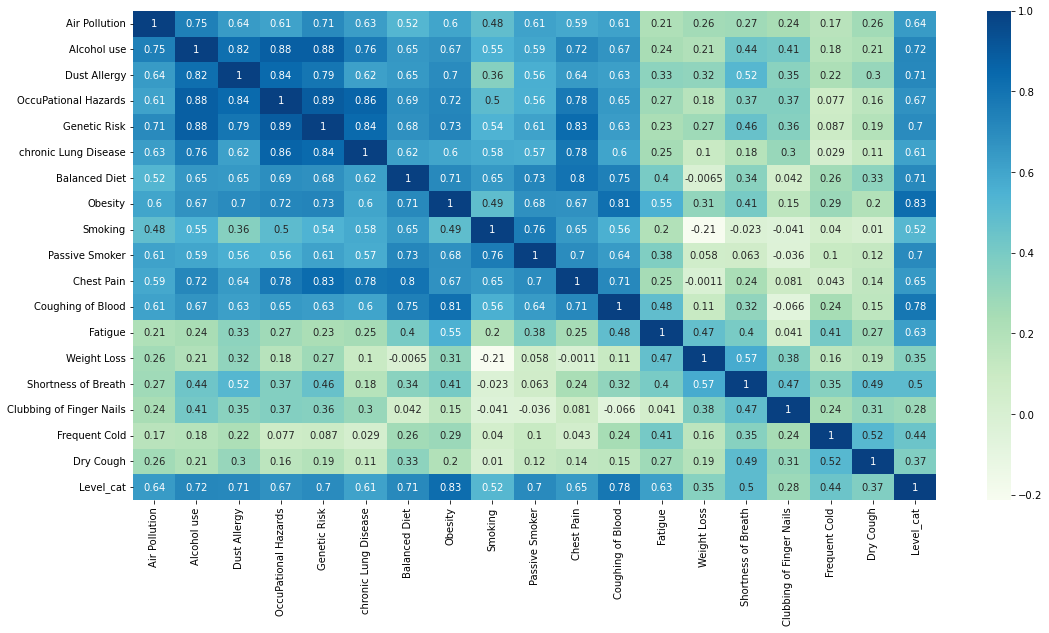

In [9]:
new_df = df.drop(["index", "Age", "Gender", "Wheezing", "Swallowing Difficulty", "Snoring"], axis=1)
plt.figure(figsize = (18,9))
sns.heatmap(new_df.corr(), cmap='GnBu', annot=True)
plt.show()

## Gradient parameter explanation

loss : {‘log_loss’, ‘exponential’}, default=’log_loss’
The loss function to be optimized. ‘log_loss’ refers to binomial and multinomial deviance, the same as used in logistic regression. It is a good choice for classification with probabilistic outputs. For loss ‘exponential’, gradient boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf).

n_estimators : int, default=100
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

subsample : float, default=1.0
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].

criterion : {‘friedman_mse’, ‘squared_error’}, default=’friedman_mse’
The function to measure the quality of a split. Supported criteria are ‘friedman_mse’ for the mean squared error with improvement score by Friedman, ‘squared_error’ for mean squared error. The default value of ‘friedman_mse’ is generally the best as it can provide a better approximation in some cases.

min_samples_split : int or float, default=2
The minimum number of samples required to split an internal node:
* If int, values must be in the range [2, inf).
* If float, values must be in the range (0.0, 1.0] and min_samples_split will be ceil(min_samples_split * n_samples).

min_samples_leaf : int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, values must be in the range [1, inf).
* If float, values must be in the range (0.0, 1.0) and min_samples_leaf will be ceil(min_samples_leaf * n_samples).

min_weight_fraction_leaf : float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. Values must be in the range [0.0, 0.5].

max_depth : int or None, default=3
Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. If int, values must be in the range [1, inf).

min_impurity_decrease : float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Values must be in the range [0.0, inf).

max_features : {‘sqrt’, ‘log2’}, int or float, default=None
The number of features to consider when looking for the best split:
* If int, values must be in the range [1, inf).
* If float, values must be in the range (0.0, 1.0] and the features considered at each split will be max(1, int(max_features * n_features_in_)).
* If ‘sqrt’, then max_features=sqrt(n_features).
* If ‘log2’, then max_features=log2(n_features).
* If None, then max_features=n_features.

Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

In [34]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=0)
boost = GradientBoostingClassifier(n_estimators=1000)
boost.fit(X_new_train, y_new_train)

GradientBoostingClassifier(n_estimators=1000)

In [35]:
boost.feature_importances_

array([3.14813464e-02, 1.68526216e-17, 3.06749266e-04, 1.48244137e-01,
       2.34634264e-02, 2.17359243e-04, 4.00635062e-04, 1.37163468e-03,
       2.46487840e-05, 4.29937128e-03, 1.08211905e-01, 2.76054692e-01,
       1.08105167e-03, 1.69126439e-02, 1.40826201e-01, 1.48230317e-04,
       7.53781205e-02, 1.28827771e-01, 1.43579436e-02, 1.99955229e-02,
       5.41154270e-04, 3.25842933e-05, 7.82287182e-03])

Above is important. It's the impurity-based feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. These values sum up to 1.

In [36]:
y_pred = boost.predict(X_new_test)

In [38]:
report = classification_report(y_new_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00       108

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [42]:
boost.learning_rate

0.1

In [47]:
# Create classification matrices
dtrain_clf = xgb.DMatrix(X_new_train, y_new_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_new_test, y_new_test, enable_categorical=True)

In [50]:
params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 3}
n = 1000

results = xgb.cv(params, dtrain_clf)

XGBoostError: [11:27:51] c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\common\common.h:239: XGBoost version not compiled with GPU support.